In [1]:
import math, random
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def generatePolygon( ctrX, ctrY, aveRadius, irregularity, spikeyness, numVerts ) :
    irregularity =  irregularity * 2*math.pi / numVerts
    spikeyness = spikeyness * aveRadius
    # generate n angle steps
    angleSteps = []
    lower = (2*math.pi / numVerts) - irregularity
    upper = (2*math.pi / numVerts) + irregularity
    sum = 0
    for i in range(numVerts) :
        tmp = random.uniform(lower, upper)
        angleSteps.append( tmp )
        sum = sum + tmp
    # normalize the steps so that point 0 and point n+1 are the same
    k = sum / (2*math.pi)
    for i in range(numVerts) :
        angleSteps[i] = angleSteps[i] / k
    # now generate the points
    points = []
    angle = random.uniform(0, 2*math.pi)
    for i in range(numVerts) :
        r_i =  random.gauss(aveRadius, spikeyness)
        x =  ctrX + r_i*math.cos(angle)
        y = ctrY + r_i*math.sin(angle)
        points.append( (int(x),int(y)) )
        angle = angle + angleSteps[i]

    return points

verts = generatePolygon( ctrX=100, ctrY=100, aveRadius=200, irregularity=1, spikeyness=0.11, numVerts=50 )
pa = Polygon(verts)

In [2]:
    xs = [i[0] for i in verts]
    ys = [i[1] for i in verts] 
    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)

In [10]:
p=[]
for i in range(round(minx),round(maxx)):
  for j in range(round(miny),round(maxy)):
    po = Point(i,j)
    if(pa.contains(po)):
      p.append([i,j])
import matplotlib.pyplot as plt
x = [i[0] for i in p]
y = [i[1] for i in p] 
#plt.scatter(x,y)

***K-MEANS CLUSTERING***

In [7]:
X = np.asarray(p)
n_regions = 20
kmeans = KMeans(n_clusters = n_regions, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [8]:
colors = ['yellowgreen','khaki','cornflowerblue','darkgrey']
regions = ['Grasslands','Agriculture','Water Bodies','Constructed Buildings']
a = [0]*4
for i in range(4):
  print('Enter Percentage coverage of ', regions[i],": ")
  a[i] = int(input())

Enter Percentage coverage of  Grasslands : 
30
Enter Percentage coverage of  Agriculture : 
20
Enter Percentage coverage of  Water Bodies : 
20
Enter Percentage coverage of  Constructed Buildings : 
30


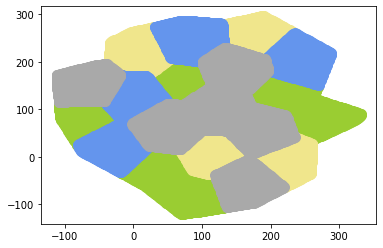

In [9]:
ind = 0
for i in range(4):
  r = (a[i]*n_regions)//100
  for j in range(r):
    plt.scatter(X[y_kmeans == ind, 0], X[y_kmeans == ind, 1], s = 100, c = colors[i])
    a[i]-=1
    ind+=1
plt.show()